# #0 Table of Content
1. Import packages and data
2. Understanding merchant characteristics  
   2.1. 1st-level view : simple scatter plot  
   2.2. 2nd-level view : clustering  
   2.3. 3rd-level view : clustering round 2  
3. Export data

# #1 Import packages, data and creating functions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
colors = sns.color_palette("Set1", 7)
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
merchant_table = pd.read_csv("../asset/etlMerchant.csv")
product_table  = pd.read_csv("../asset/etlProduct.csv")
user_table     = pd.read_csv("../asset/etlUser.csv")
review_table   = pd.read_csv("../asset/etlReview.csv")

In [3]:
merchant_table = merchant_table[['merchant_id','days','total_rating','no_follower']]
merchant_table

,merchant_id,days,total_rating,no_follower
0,983b8576-0dd8-4c84-acdf-0915734adbd0,210,809,630
1,6e3b6c48-c873-44ac-b99a-845f35a30cf7,2920,24200,11500
2,90f139bf-4bb4-4f5c-8511-f99ede1d71b2,210,367,2500
3,355137ee-5cdc-46f9-a573-c4e6a6cbe5f5,1460,18800,7600
4,7b1295a7-da41-4856-9f62-48121ce1c6a3,1095,5900,7900
...,...,...,...,...
285,6242ef4e-dc77-4855-85dc-52393195ee0c,2555,1600,3600
286,8d519baf-42aa-43a4-a29c-bb9e2df12182,1825,124100,44600
287,07b010d6-9582-4b5d-9b77-fe2f02ecda63,2920,9500,4700
288,358eafab-6a5f-4a70-a4f1-7e4e7c90c4e0,360,476,404


# #2 Understanding merchant characteristics

## #2.1 1st-level view : simple scatter plot

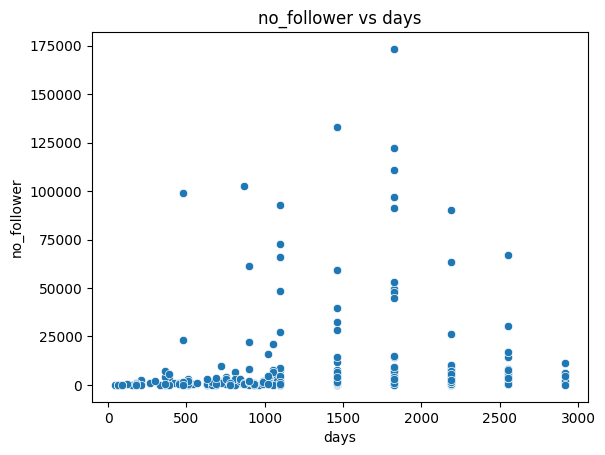

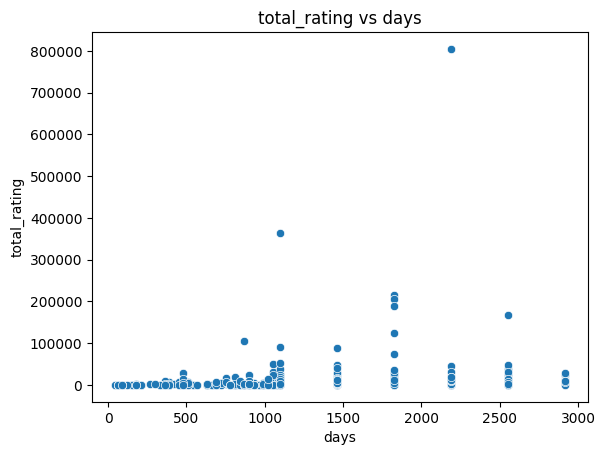

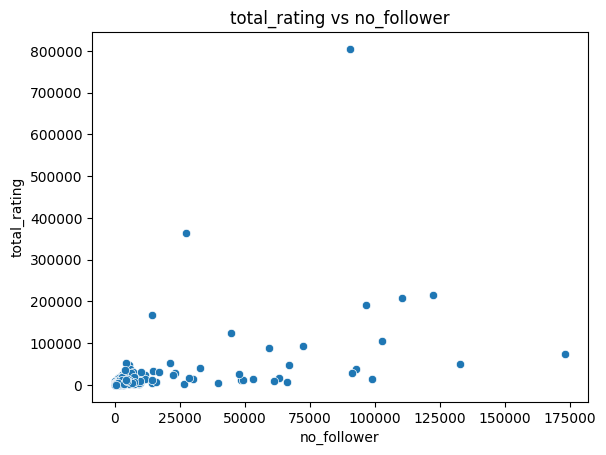

In [4]:
sns.scatterplot(data=merchant_table, x='days', y='no_follower')
plt.title("no_follower vs days")
plt.show()

sns.scatterplot(data=merchant_table, x='days', y='total_rating')
plt.title("total_rating vs days")
plt.show()

sns.scatterplot(data=merchant_table, x='no_follower', y='total_rating')
plt.title("total_rating vs no_follower")
plt.show()

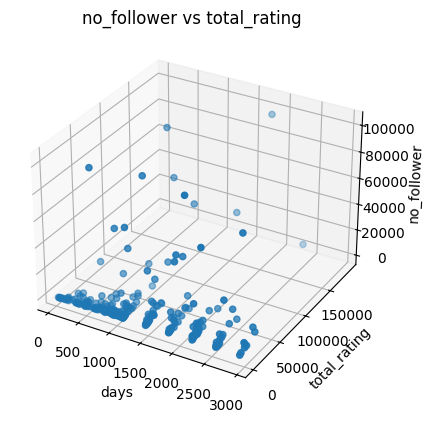

In [5]:
drop_outlier = merchant_table
drop_outlier = drop_outlier[drop_outlier['total_rating'] < drop_outlier['total_rating'].quantile(0.99)]
# drop_outlier = drop_outlier[drop_outlier['days'] < drop_outlier['days'].quantile(0.99)]
drop_outlier = drop_outlier[drop_outlier['no_follower'] < drop_outlier['no_follower'].quantile(0.99)]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    drop_outlier['days'], 
    drop_outlier['total_rating'], 
    drop_outlier['no_follower'],
    marker='o'
)

ax.set_xlabel('days')
ax.set_ylabel('total_rating')
ax.set_zlabel('no_follower')

plt.title("no_follower vs total_rating ")
plt.show()

## #2.2 2nd-level view : clustering

In [6]:
data = merchant_table[['days','total_rating','no_follower']]

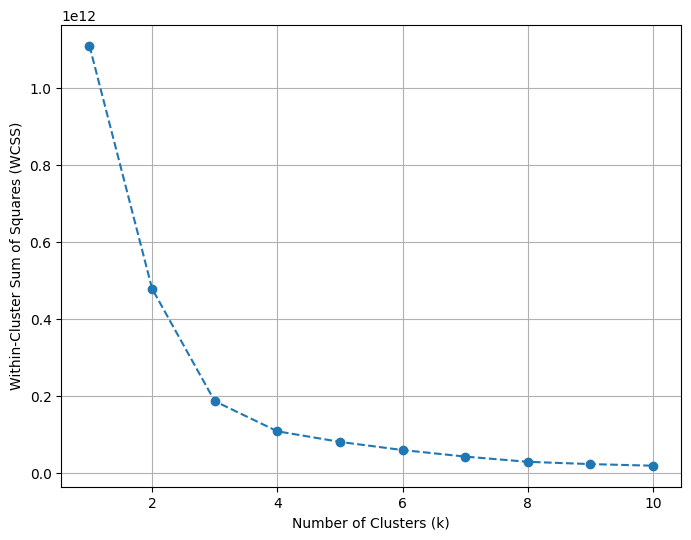

In [7]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

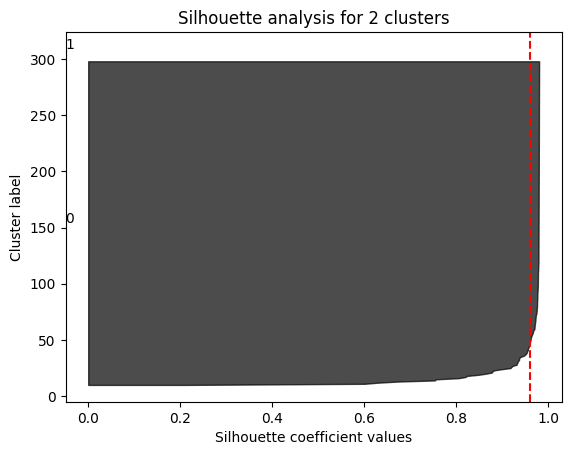

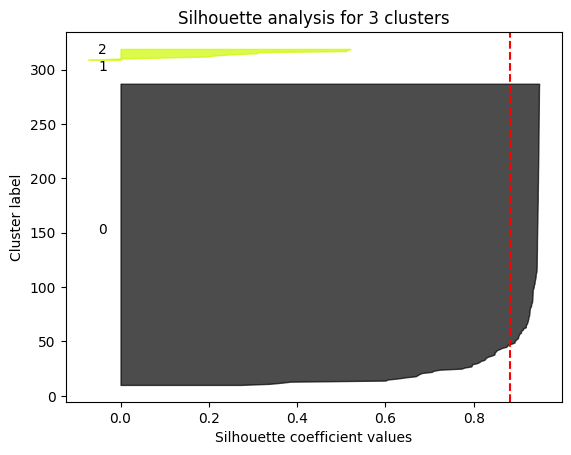

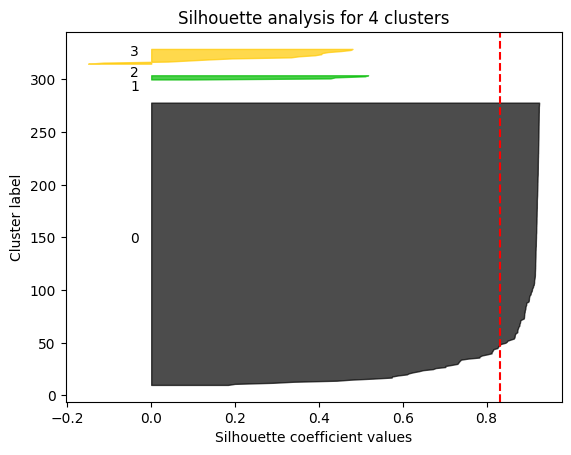

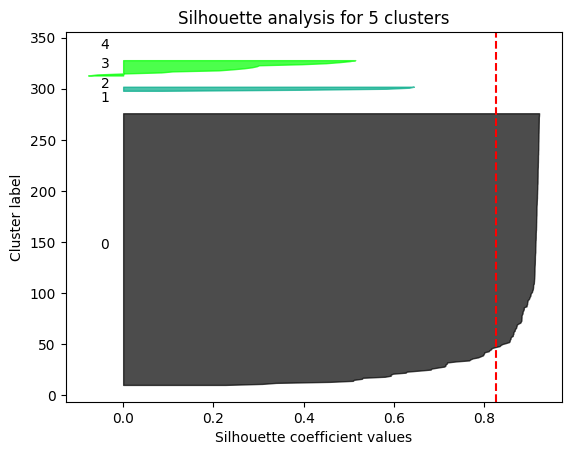

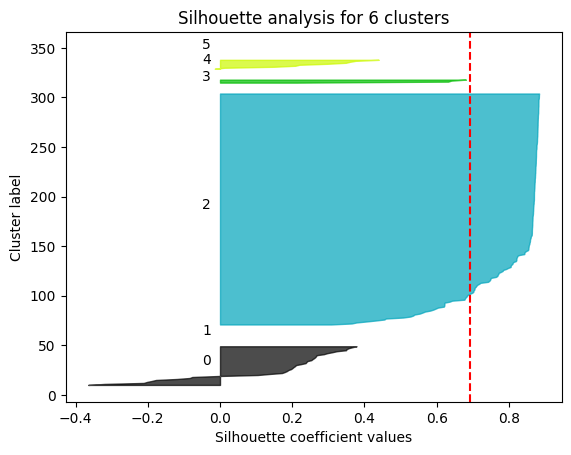

In [8]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Initialize the K-Means model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data)
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)
    
    # Compute the silhouette values for each data point
    sample_silhouette_values = silhouette_samples(data, cluster_labels)
    
    # Create a subplot for the silhouette plot
    plt.figure()
    plt.title(f"Silhouette analysis for {n_clusters} clusters")
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10
    
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    
    # The vertical line for the average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    plt.show()

In [9]:
K = 4

model_1 = KMeans(n_clusters=K, n_init=10, random_state=42)
model_1.fit(data)

merchant_table['tag_1'] = model_1.predict(merchant_table[['days','total_rating','no_follower']])
merchant_table

,merchant_id,days,total_rating,no_follower,tag_1
0,983b8576-0dd8-4c84-acdf-0915734adbd0,210,809,630,0
1,6e3b6c48-c873-44ac-b99a-845f35a30cf7,2920,24200,11500,0
2,90f139bf-4bb4-4f5c-8511-f99ede1d71b2,210,367,2500,0
3,355137ee-5cdc-46f9-a573-c4e6a6cbe5f5,1460,18800,7600,0
4,7b1295a7-da41-4856-9f62-48121ce1c6a3,1095,5900,7900,0
...,...,...,...,...,...
285,6242ef4e-dc77-4855-85dc-52393195ee0c,2555,1600,3600,0
286,8d519baf-42aa-43a4-a29c-bb9e2df12182,1825,124100,44600,3
287,07b010d6-9582-4b5d-9b77-fe2f02ecda63,2920,9500,4700,0
288,358eafab-6a5f-4a70-a4f1-7e4e7c90c4e0,360,476,404,0


C:\Users\edmund\AppData\Local\Temp\ipykernel_14456\1243384819.py:1: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.scatterplot(data=merchant_table, x='days', y='no_follower', hue='tag_1', palette=colors)


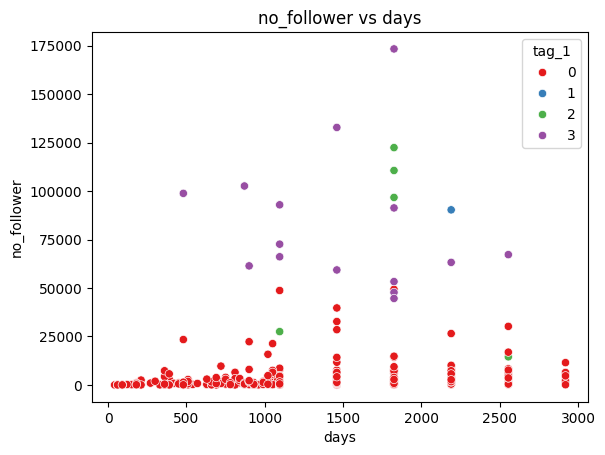

C:\Users\edmund\AppData\Local\Temp\ipykernel_14456\1243384819.py:5: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.scatterplot(data=merchant_table, x='days', y='total_rating', hue='tag_1', palette=colors)


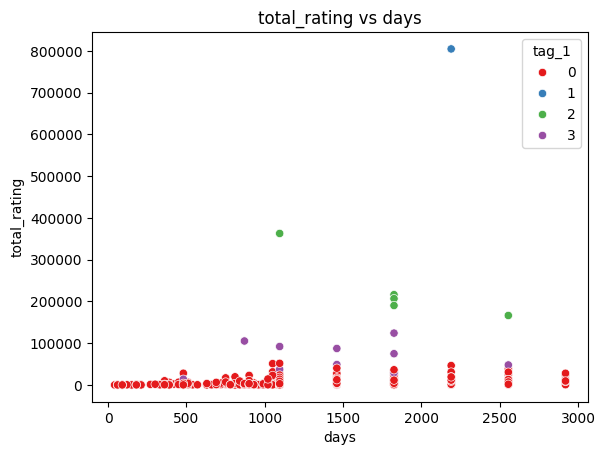

C:\Users\edmund\AppData\Local\Temp\ipykernel_14456\1243384819.py:9: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.scatterplot(data=merchant_table, x='no_follower', y='total_rating', hue='tag_1', palette=colors)


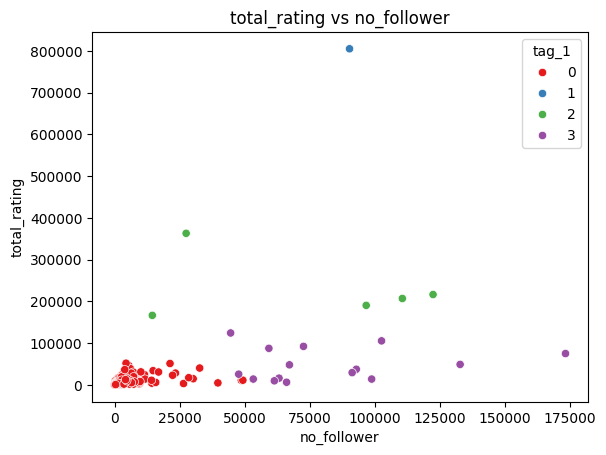

In [10]:
sns.scatterplot(data=merchant_table, x='days', y='no_follower', hue='tag_1', palette=colors)
plt.title("no_follower vs days")
plt.show()

sns.scatterplot(data=merchant_table, x='days', y='total_rating', hue='tag_1', palette=colors)
plt.title("total_rating vs days")
plt.show()

sns.scatterplot(data=merchant_table, x='no_follower', y='total_rating', hue='tag_1', palette=colors)
plt.title("total_rating vs no_follower")
plt.show()

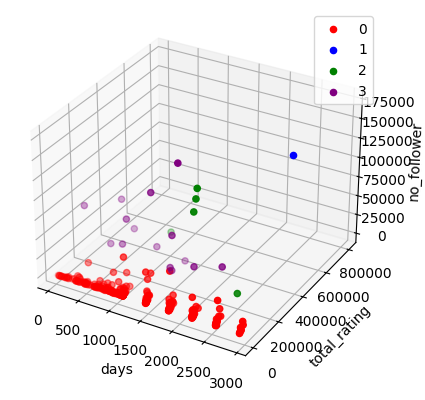

In [11]:
cluster_colors = {
    0:'red',
    1:'blue',
    2:'green',
    3:'purple'
}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for cluster, color in cluster_colors.items():
    cluster_data = merchant_table[merchant_table['tag_1'] == cluster]
    ax.scatter(cluster_data['days'], cluster_data['total_rating'], cluster_data['no_follower'], label=cluster, c=color)

ax.set_xlabel('days')
ax.set_ylabel('total_rating')
ax.set_zlabel('no_follower')

ax.legend()

plt.show()

## #2.3 3rd-level view : clustering round 2

In [12]:
data = merchant_table[merchant_table['tag_1'] == 0][['days','total_rating','no_follower']]
data

,days,total_rating,no_follower
0,210,809,630
1,2920,24200,11500
2,210,367,2500
3,1460,18800,7600
4,1095,5900,7900
...,...,...,...
284,1460,3700,1300
285,2555,1600,3600
287,2920,9500,4700
288,360,476,404


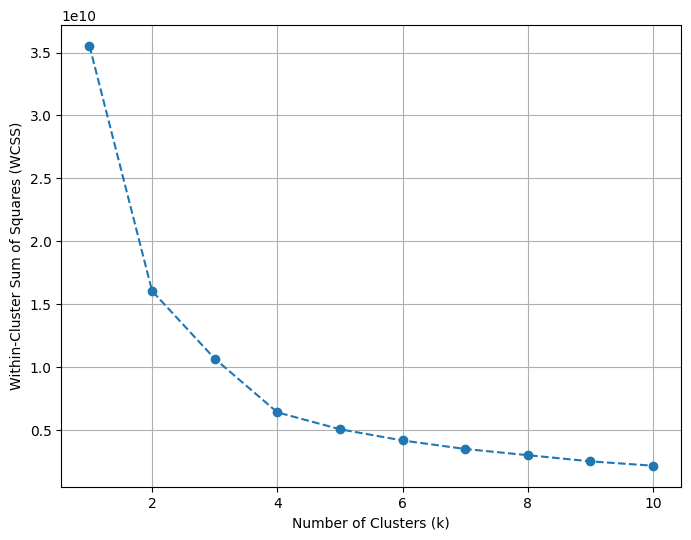

In [13]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

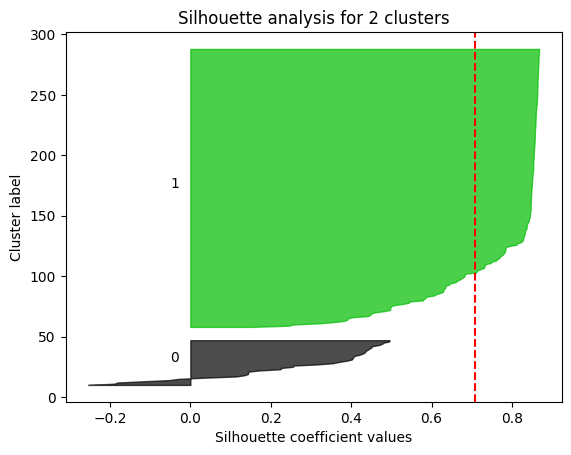

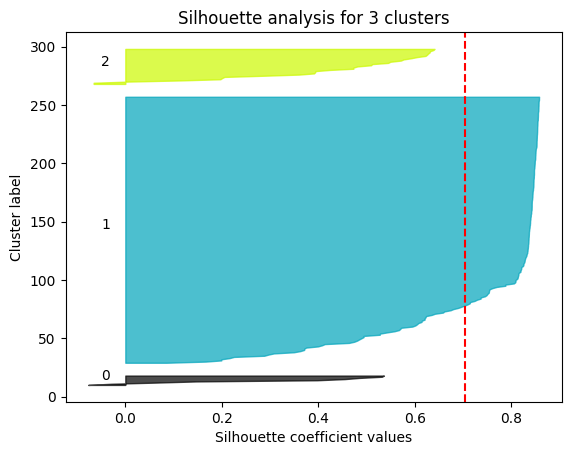

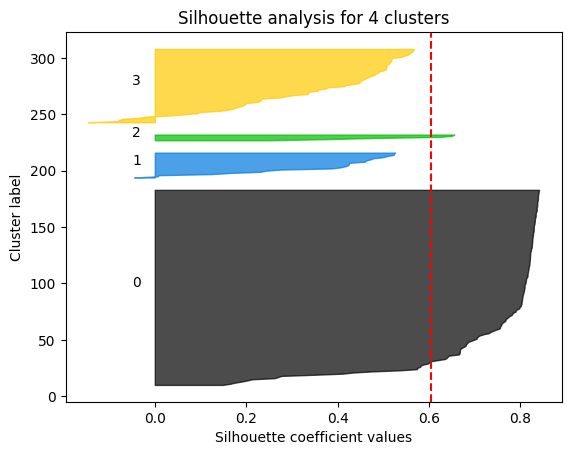

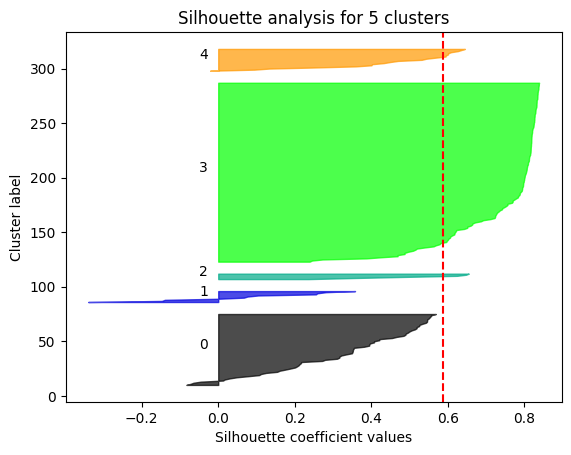

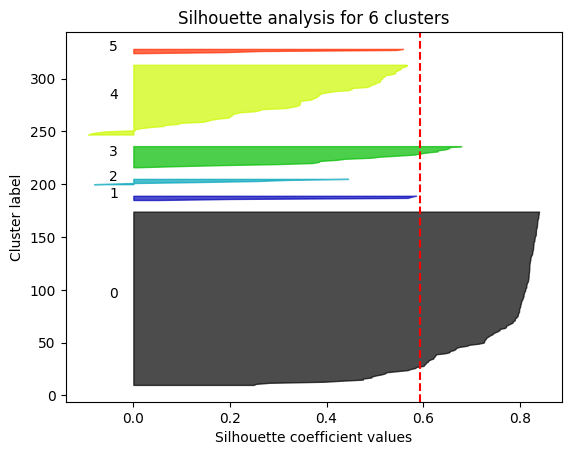

In [14]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Initialize the K-Means model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data)
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)
    
    # Compute the silhouette values for each data point
    sample_silhouette_values = silhouette_samples(data, cluster_labels)
    
    # Create a subplot for the silhouette plot
    plt.figure()
    plt.title(f"Silhouette analysis for {n_clusters} clusters")
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10
    
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    
    # The vertical line for the average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    plt.show()

In [15]:
K = 4

model_2 = KMeans(n_clusters=K, n_init=10, random_state=42)
model_2.fit(data)

merchant_table_0 = merchant_table[merchant_table['tag_1'] == 0].reset_index(drop=True)
merchant_table_0['tag_2'] = model_2.predict(merchant_table_0[['days','total_rating','no_follower']])
merchant_table_0

,merchant_id,days,total_rating,no_follower,tag_1,tag_2
0,983b8576-0dd8-4c84-acdf-0915734adbd0,210,809,630,0,0
1,6e3b6c48-c873-44ac-b99a-845f35a30cf7,2920,24200,11500,0,1
2,90f139bf-4bb4-4f5c-8511-f99ede1d71b2,210,367,2500,0,0
3,355137ee-5cdc-46f9-a573-c4e6a6cbe5f5,1460,18800,7600,0,3
4,7b1295a7-da41-4856-9f62-48121ce1c6a3,1095,5900,7900,0,3
...,...,...,...,...,...,...
264,e786f7a9-445f-4ef5-ad8c-71e5e0af234a,1460,3700,1300,0,0
265,6242ef4e-dc77-4855-85dc-52393195ee0c,2555,1600,3600,0,0
266,07b010d6-9582-4b5d-9b77-fe2f02ecda63,2920,9500,4700,0,3
267,358eafab-6a5f-4a70-a4f1-7e4e7c90c4e0,360,476,404,0,0


In [16]:
merchant_table_123 = merchant_table[~merchant_table['merchant_id'].isin(merchant_table_0['merchant_id'])].reset_index(drop=True)
merchant_table_123 = merchant_table_123.rename(columns={'tag_1':'tag'})
merchant_table_123['tag'] = merchant_table_123['tag'].astype(str)
merchant_table_123

,merchant_id,days,total_rating,no_follower,tag
0,a1fae61e-f258-4d22-8d36-f9c85fe40979,1825,216200,122400,2
1,f4b60338-9688-4670-8c6c-18c01440f2ac,1095,37200,92900,3
2,bea2bb49-264c-4eba-8506-93ce2b76715a,1825,206700,110600,2
3,8f7e2acf-b671-4d2f-b4b7-fdc2a31e57f6,1825,74800,173300,3
4,1a960d60-0940-4642-913e-62cbfdef298a,1460,87300,59300,3
5,50ab6104-b628-4ff1-b6c9-ddc4a296d07a,2190,15900,63200,3
6,eb24fb2b-778a-4b71-b80a-e8cbc978f111,900,9500,61400,3
7,4581dd45-53cf-492b-bc8a-28270bbfe966,480,13700,98800,3
8,5e58c288-c7ae-4042-8e5f-159582058985,1095,92000,72600,3
9,223cc903-9dd1-4a8f-868b-6a2bf84009fb,1095,6100,66100,3


In [17]:
merchant_table_0['tag'] = merchant_table_0['tag_1'].astype(str) + '_' + merchant_table_0['tag_2'].astype(str)
merchant_table_0 = merchant_table_0.drop(columns=['tag_1','tag_2'], axis=1)
merchant_table_0

,merchant_id,days,total_rating,no_follower,tag
0,983b8576-0dd8-4c84-acdf-0915734adbd0,210,809,630,0_0
1,6e3b6c48-c873-44ac-b99a-845f35a30cf7,2920,24200,11500,0_1
2,90f139bf-4bb4-4f5c-8511-f99ede1d71b2,210,367,2500,0_0
3,355137ee-5cdc-46f9-a573-c4e6a6cbe5f5,1460,18800,7600,0_3
4,7b1295a7-da41-4856-9f62-48121ce1c6a3,1095,5900,7900,0_3
...,...,...,...,...,...
264,e786f7a9-445f-4ef5-ad8c-71e5e0af234a,1460,3700,1300,0_0
265,6242ef4e-dc77-4855-85dc-52393195ee0c,2555,1600,3600,0_0
266,07b010d6-9582-4b5d-9b77-fe2f02ecda63,2920,9500,4700,0_3
267,358eafab-6a5f-4a70-a4f1-7e4e7c90c4e0,360,476,404,0_0


In [18]:
merchant_table = pd.concat([merchant_table_0, merchant_table_123]).reset_index(drop=True)
merchant_table

,merchant_id,days,total_rating,no_follower,tag
0,983b8576-0dd8-4c84-acdf-0915734adbd0,210,809,630,0_0
1,6e3b6c48-c873-44ac-b99a-845f35a30cf7,2920,24200,11500,0_1
2,90f139bf-4bb4-4f5c-8511-f99ede1d71b2,210,367,2500,0_0
3,355137ee-5cdc-46f9-a573-c4e6a6cbe5f5,1460,18800,7600,0_3
4,7b1295a7-da41-4856-9f62-48121ce1c6a3,1095,5900,7900,0_3
...,...,...,...,...,...
285,8d58f5da-57ce-43c3-b22a-8649f8ee74b9,1095,362800,27500,2
286,e1b03901-1db2-4136-8619-cc614839ee0d,1460,48800,132800,3
287,f5c98ece-a617-4871-9ddf-203d456af25e,1825,29100,91300,3
288,68e951ae-f401-410d-a852-d51250ec98c9,2190,804800,90300,1


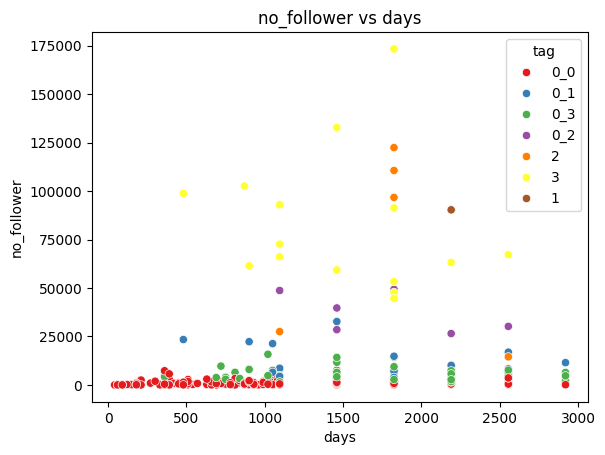

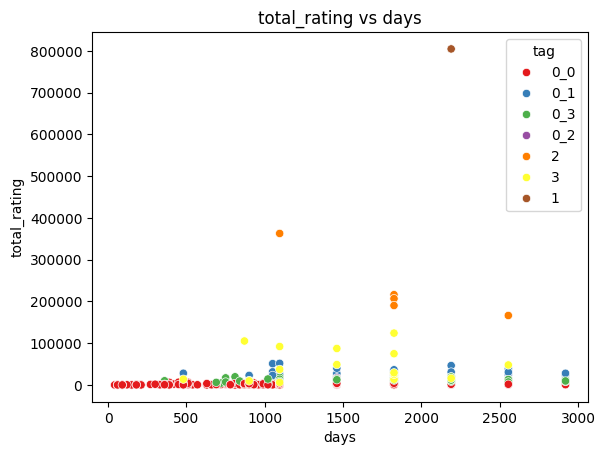

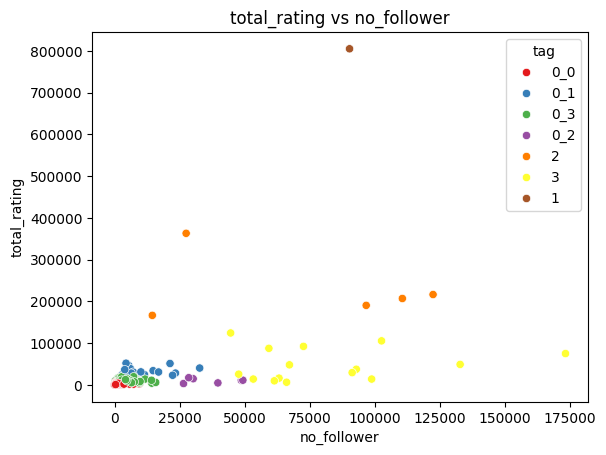

In [19]:
sns.scatterplot(data=merchant_table, x='days', y='no_follower', hue='tag', palette='Set1')
plt.title("no_follower vs days")
plt.show()

sns.scatterplot(data=merchant_table, x='days', y='total_rating', hue='tag', palette='Set1')
plt.title("total_rating vs days")
plt.show()

sns.scatterplot(data=merchant_table, x='no_follower', y='total_rating', hue='tag', palette='Set1')
plt.title("total_rating vs no_follower")
plt.show()

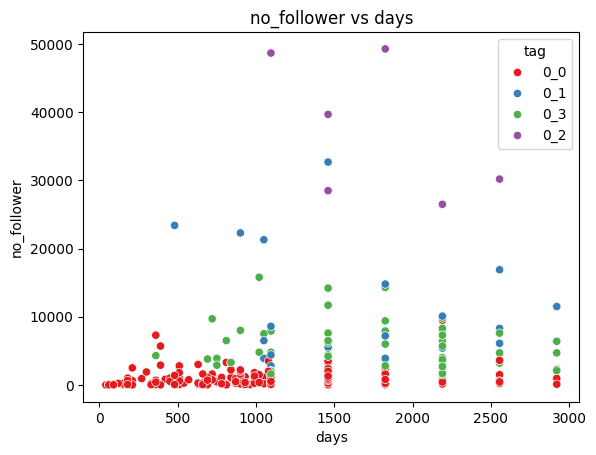

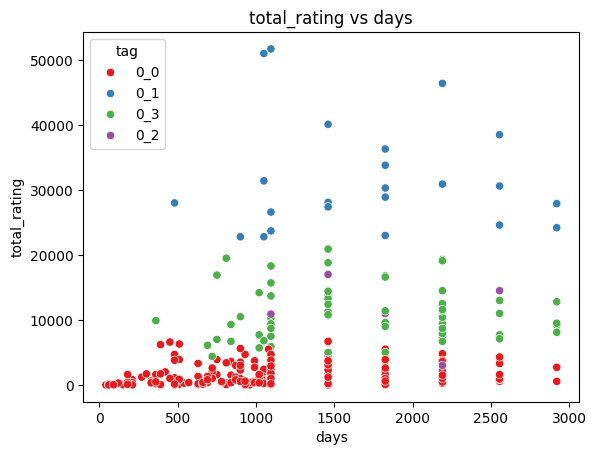

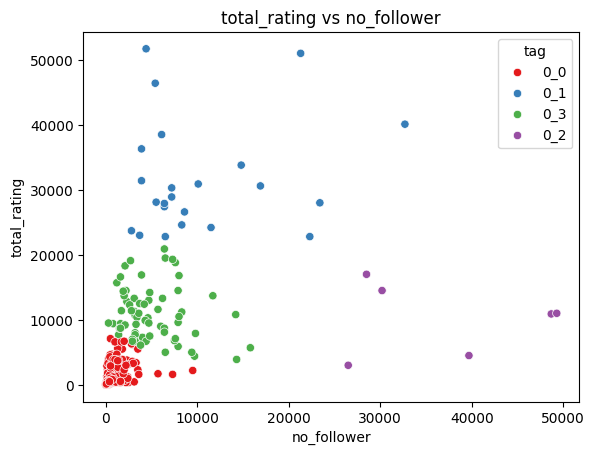

In [20]:
sns.scatterplot(data=merchant_table_0, x='days', y='no_follower', hue='tag', palette='Set1')
plt.title("no_follower vs days")
plt.show()

sns.scatterplot(data=merchant_table_0, x='days', y='total_rating', hue='tag', palette='Set1')
plt.title("total_rating vs days")
plt.show()

sns.scatterplot(data=merchant_table_0, x='no_follower', y='total_rating', hue='tag', palette='Set1')
plt.title("total_rating vs no_follower")
plt.show()

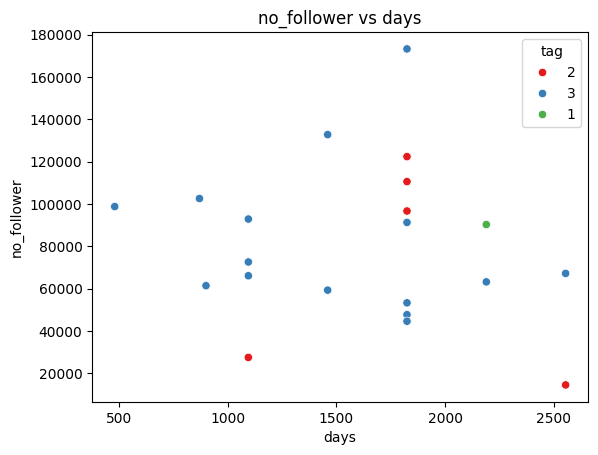

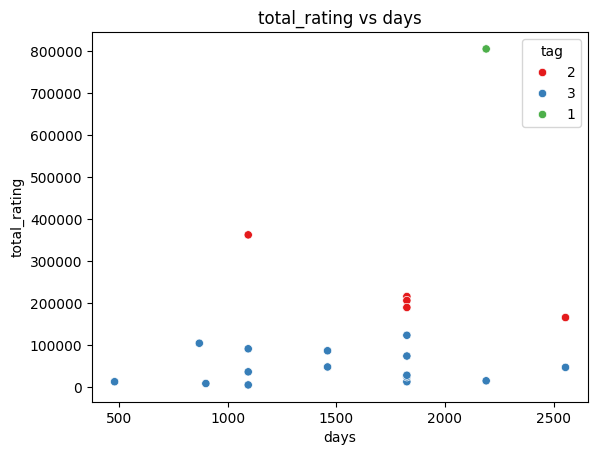

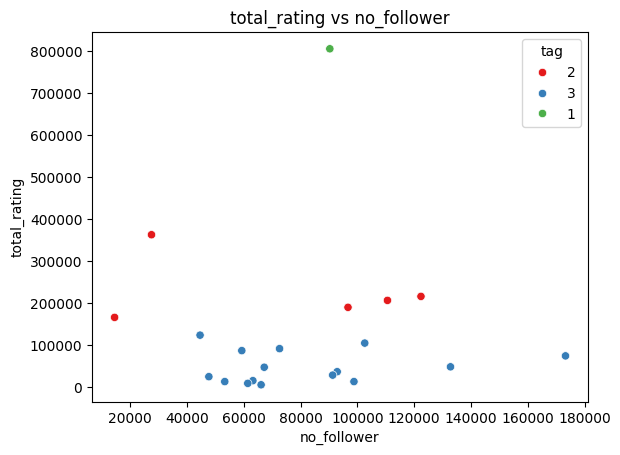

In [21]:
sns.scatterplot(data=merchant_table_123, x='days', y='no_follower', hue='tag', palette='Set1')
plt.title("no_follower vs days")
plt.show()

sns.scatterplot(data=merchant_table_123, x='days', y='total_rating', hue='tag', palette='Set1')
plt.title("total_rating vs days")
plt.show()

sns.scatterplot(data=merchant_table_123, x='no_follower', y='total_rating', hue='tag', palette='Set1')
plt.title("total_rating vs no_follower")
plt.show()

In [22]:
mapping_dict = {
    '1'  :'ultra_merchant',
    '2'  :'top_merchant',
    '3'  :'intermediate_merchant',
    '0_1':'beginner_L4_merchant',
    '0_2':'beginner_L3_merchant',
    '0_3':'beginner_L2_merchant',
    '0_0':'beginner_L1_merchant'
}

In [23]:
merchant_table['tag'] = merchant_table['tag'].map(mapping_dict)
merchant_table

,merchant_id,days,total_rating,no_follower,tag
0,983b8576-0dd8-4c84-acdf-0915734adbd0,210,809,630,beginner_L1_merchant
1,6e3b6c48-c873-44ac-b99a-845f35a30cf7,2920,24200,11500,beginner_L4_merchant
2,90f139bf-4bb4-4f5c-8511-f99ede1d71b2,210,367,2500,beginner_L1_merchant
3,355137ee-5cdc-46f9-a573-c4e6a6cbe5f5,1460,18800,7600,beginner_L2_merchant
4,7b1295a7-da41-4856-9f62-48121ce1c6a3,1095,5900,7900,beginner_L2_merchant
...,...,...,...,...,...
285,8d58f5da-57ce-43c3-b22a-8649f8ee74b9,1095,362800,27500,top_merchant
286,e1b03901-1db2-4136-8619-cc614839ee0d,1460,48800,132800,intermediate_merchant
287,f5c98ece-a617-4871-9ddf-203d456af25e,1825,29100,91300,intermediate_merchant
288,68e951ae-f401-410d-a852-d51250ec98c9,2190,804800,90300,ultra_merchant


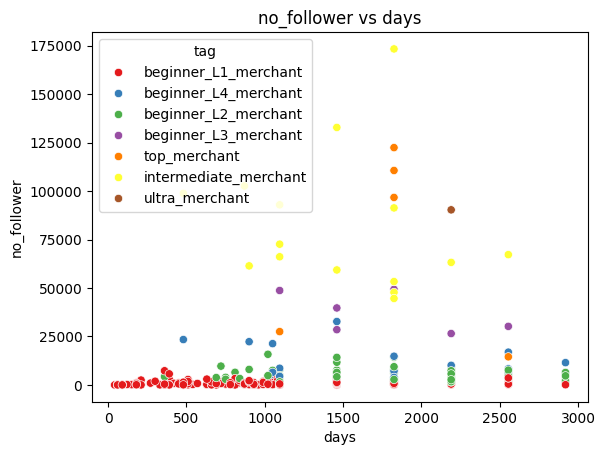

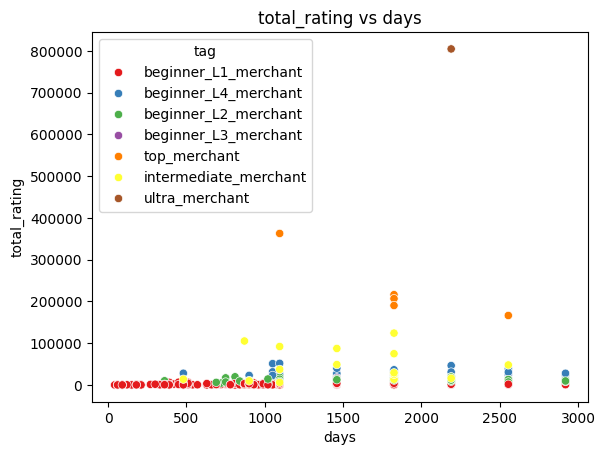

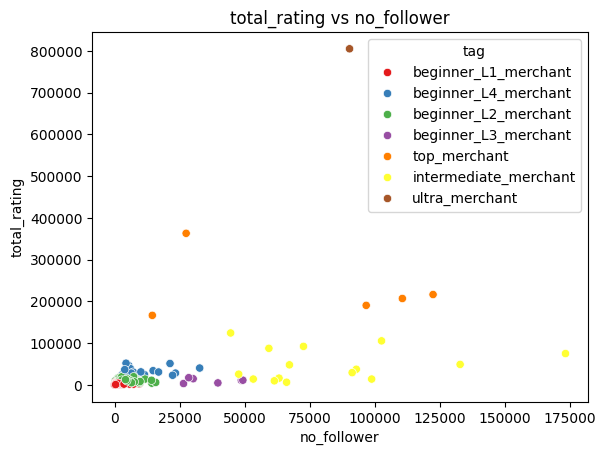

In [24]:
sns.scatterplot(data=merchant_table, x='days', y='no_follower', hue='tag', palette='Set1')
plt.title("no_follower vs days")
plt.show()

sns.scatterplot(data=merchant_table, x='days', y='total_rating', hue='tag', palette='Set1')
plt.title("total_rating vs days")
plt.show()

sns.scatterplot(data=merchant_table, x='no_follower', y='total_rating', hue='tag', palette='Set1')
plt.title("total_rating vs no_follower")
plt.show()

# #3 Export Data

In [39]:
output_table = merchant_table[['merchant_id','tag']].merge(product_table[['merchant_id','product_id']], on='merchant_id', how='left')
output_table = output_table[['product_id','tag']]
output_table

,product_id,tag
0,912d838b-5e84-4aef-a0dd-bb23f44e5913,beginner_L1_merchant
1,33cfcddf-a606-4d60-8d78-5926aee333ac,beginner_L1_merchant
2,34bb8bfe-e134-41af-a487-3b8d4ce6fff0,beginner_L4_merchant
3,bcb684c1-3ffa-435c-b1ae-fc48a34e28cc,beginner_L4_merchant
4,9174df39-ee3f-4478-9911-5c7debe5a07e,beginner_L4_merchant
...,...,...
587,78b831e8-12cb-488a-a5af-32de367613ea,intermediate_merchant
588,cb316a82-9106-466d-8928-985feddecc04,intermediate_merchant
589,44a041f1-24d2-4e81-b1e1-44fcdc41ef19,intermediate_merchant
590,9958c499-9833-432d-bcca-efea07f59629,ultra_merchant


In [42]:
addProduct = pd.read_csv("../asset/addProduct.csv")
addProduct

,product_id,avg_norm_rating,count_norm_rating
0,912d838b-5e84-4aef-a0dd-bb23f44e5913,0.00,197
1,34bb8bfe-e134-41af-a487-3b8d4ce6fff0,0.02,40
2,35ff0f3c-8a06-4e33-a789-319ff793220d,-0.07,14
3,33cfcddf-a606-4d60-8d78-5926aee333ac,-0.12,14
4,58b2475a-2ba2-4404-b9b5-35a633c76462,0.02,352
...,...,...,...
587,6614655f-4e19-4a09-bf0c-9e147817aebf,0.00,9
588,1230caa9-a28e-4178-9dbc-d0d9f39b928e,0.00,0
589,8b1afcc4-2522-48fb-8e1a-0a186525d692,0.00,0
590,e634b9ba-08e3-4d00-997b-ee4a3437b448,-0.03,8


In [43]:
output_table = output_table.merge(addProduct, on='product_id', how='right')
output_table

,product_id,tag,avg_norm_rating,count_norm_rating
0,912d838b-5e84-4aef-a0dd-bb23f44e5913,beginner_L1_merchant,0.00,197
1,34bb8bfe-e134-41af-a487-3b8d4ce6fff0,beginner_L4_merchant,0.02,40
2,35ff0f3c-8a06-4e33-a789-319ff793220d,beginner_L1_merchant,-0.07,14
3,33cfcddf-a606-4d60-8d78-5926aee333ac,beginner_L1_merchant,-0.12,14
4,58b2475a-2ba2-4404-b9b5-35a633c76462,beginner_L2_merchant,0.02,352
...,...,...,...,...
587,6614655f-4e19-4a09-bf0c-9e147817aebf,beginner_L1_merchant,0.00,9
588,1230caa9-a28e-4178-9dbc-d0d9f39b928e,beginner_L1_merchant,0.00,0
589,8b1afcc4-2522-48fb-8e1a-0a186525d692,intermediate_merchant,0.00,0
590,e634b9ba-08e3-4d00-997b-ee4a3437b448,beginner_L2_merchant,-0.03,8


In [44]:
output_table.to_csv("../asset/addProduct.csv", index=False)